# 데이터시각화특강 기말평가 (문제6)
## 202055364 황성윤

## 6. 핸드폰 판매량 시각화 (50점)

아래는 제조사별 핸드폰 판매량이다.

In [1]:
import pandas as pd
import numpy as np
import folium
import json
import requests
import plotly.express as px
from IPython.display import HTML

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
1,2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2,2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
3,2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
4,2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20
5,2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14
6,2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21
7,2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13
8,2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16
9,2020-07,599,471,214,193,89,78,65,59,130,40,27,25,21,18,18,12


아래를 잘 읽고 물음에 답하라. (주의: 모든 그림은 판다스백엔드를 이용하여 시각하고 backend는 matplotlib를 이용한다.)

`(1)` 제조사별 판매량을 lineplot으로 시각화 하라.

Note
- x축에 Date, y축에 판매량 설정
- 그림의 크기를 (10,7)로 설정

<AxesSubplot:xlabel='Date'>

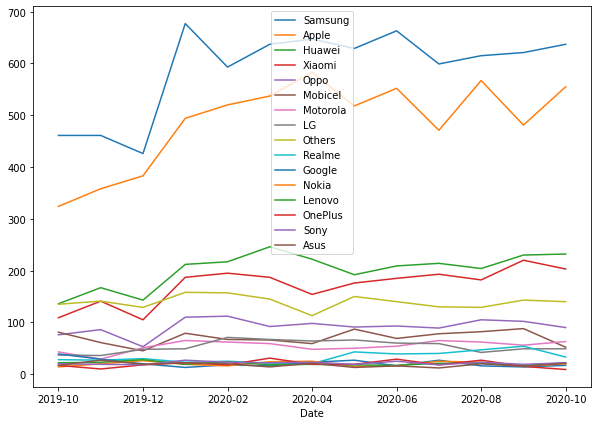

In [3]:
df.plot.line(x='Date',figsize=(10,7),backend='matplotlib')

`(2)` 제조사별 판매량을 lineplot으로 시각화 하라.

Note

- x축에 Date, y축에 판매량을 설정
- subplot을 이용
- 그림의 크기는 (10,15)로 설정

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

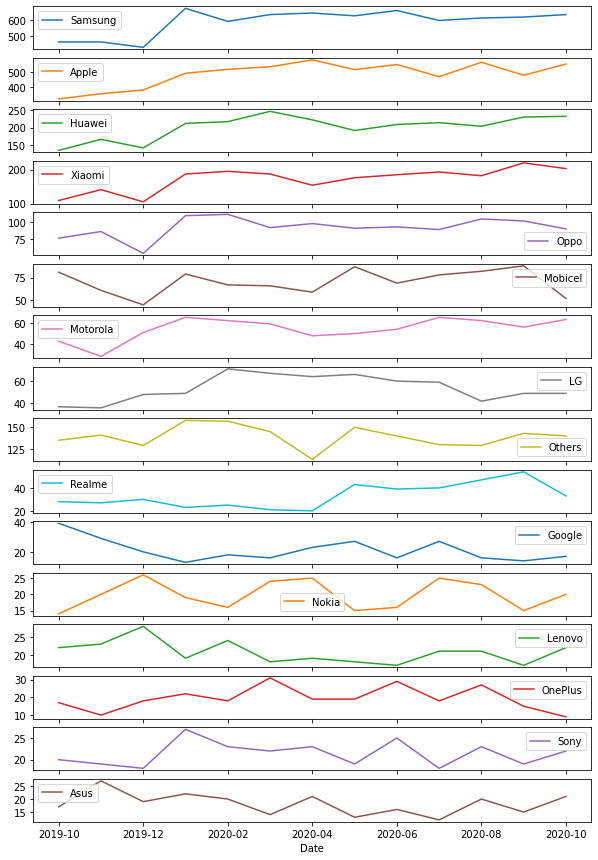

In [7]:
df.plot.line(x='Date',figsize=(10,15),subplots=True,backend='matplotlib')

`(3)` 제조사별 판매량을 조사하고 barplot으로 시각화 하라.

Note
- 누적판매량이 높은 기업부터 정렬하여 시각화

In [8]:
df1=df.set_index('Date').sum().reset_index().rename(columns={'index':'company',0:'mobile'}).\
sort_values('mobile',ascending=False).reset_index(drop=True) 
df1

,company,mobile
0,Samsung,7666
1,Apple,6343
2,Huawei,2624
3,Xiaomi,2237
4,Others,1810
5,Oppo,1197
6,Mobicel,914
7,Motorola,707
8,LG,697
9,Realme,430


array([<AxesSubplot:title={'center':'mobile'}, xlabel='company'>],
      dtype=object)

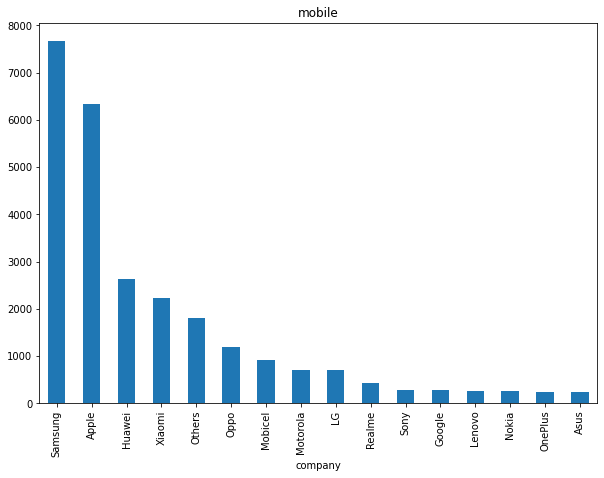

In [9]:
df1.plot.bar(x='company',y='mobile',figsize=(10,7),subplots=True,legend=False)

`(4)` 2019년 제조사별 점유율을 조사하고 pieplot으로 시각화 하라.

In [10]:
df2=df.iloc[:3,:].sum().reset_index().iloc[1:,:].rename(columns={'index':'company',0:'mobile'}) #2019년 판매량 총합
df2['2019total']=sum(df2['mobile'])
df2['rate']=df2['mobile']/df2['2019total']
df2=df2.iloc[:,[0,3]].set_index('company')
df2

,rate
company,
Samsung,0.284628
Apple,0.224873
Huawei,0.094172
Xiaomi,0.074958
Oppo,0.045397
Mobicel,0.039485
Motorola,0.025971
LG,0.025549
Others,0.085515


<AxesSubplot:ylabel='rate'>

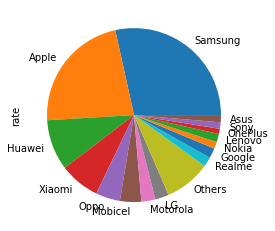

In [11]:
df2.plot.pie(y='rate',legend=False)

`(5)` 2019년과 2020년의 월별판매량의 평균을 구하고 바플랏으로 비교하라.

In [12]:
df['year']=[df['Date'][i][:4] for i in range(len(df))]
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus,year
0,2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17,2019
1,2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27,2019
2,2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19,2019
3,2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22,2020
4,2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20,2020
5,2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14,2020
6,2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21,2020
7,2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13,2020
8,2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16,2020
9,2020-07,599,471,214,193,89,78,65,59,130,40,27,25,21,18,18,12,2020


In [13]:
df.groupby('year').agg(np.mean).reset_index()

,year,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019,449.333333,355.0,148.666667,118.333333,71.666667,62.333333,41.0,40.333333,135.0,28.333333,29.333333,20.0,24.333333,15.0,19.0,21.0
1,2020,631.800000,527.8,217.800000,188.200000,98.200000,72.700000,58.4,57.600000,140.5,34.500000,18.700000,19.8,19.600000,20.7,22.1,17.4


<AxesSubplot:xlabel='year'>

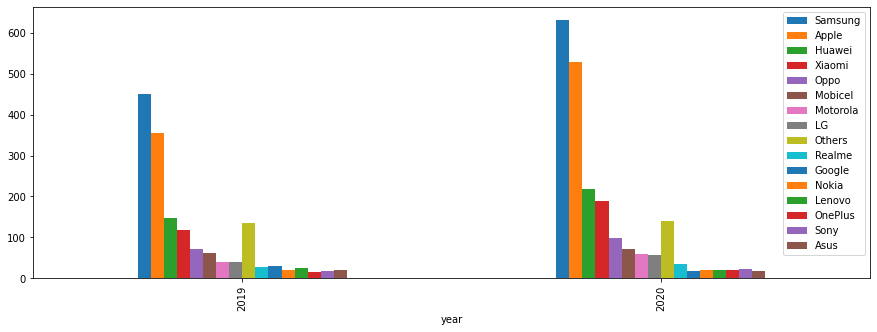

In [14]:
df.groupby('year').agg(np.mean).reset_index().plot.bar(x='year',figsize=(15,5))